### Importing Libraries and Loading the Dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [6]:
df = pd.read_csv('facebook.csv')

In [7]:
df.head()

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,078812be-8db7-4e48-aede-42267707b513,129467332357429289202,En Google-bruker,It works. Good work!,4,1,1.0.1,2009-09-09 07:36:50
1,455dcc52-5102-4b9e-b029-f1213e7c6510,317630701159287152489,En Google-bruker,Mangler en del ting mann lett savner..,3,2,1.0.1,2009-09-18 05:02:22
2,eb3a561b-484c-4ac8-babd-3564d3553e67,262956957451140959067,Googleユーザー,Excellent native app!,5,0,1.1.2,2009-12-17 01:45:42
3,b3b28e80-8645-4156-8ea3-4b41d8fb8b0f,180511796444758383729,En Google-bruker,Mangler bare innboks...,3,2,1.1.2,2009-12-17 16:26:46
4,c3c4070e-cf84-44b6-ad9f-5afe401b9915,174025437917503753906,En Google-bruker,Trenger en del oppdateringer,4,1,1.1.2,2010-01-28 15:12:41


In [11]:
df.tail()

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
4103046,ec64d6d1-636e-4bcc-b3fe-36bcca30a05c,101625244338432586097,En********ra,"Notifikasi komentar nya kacau, tidak bisa dite...",2,0,440.0.0.31.105,2023-11-18 15:25:44
4103047,bd4e090a-dad4-4279-baa5-a6f827267b7c,132023778214130843632,He***********ti,Tidak berpihak pada kemanusiaan,1,0,440.0.0.31.105,2023-11-18 15:26:45
4103048,d996780c-d5d0-4084-8a56-91ec45f2951a,127585287951982721489,Tg*****em,Tidak suka,1,0,440.0.0.31.105,2023-11-18 15:32:24
4103049,6fc6d50e-8fed-466e-b209-b8d6e64ee808,193662065871351439664,ir*********ia,Sering di banned,1,0,438.0.0.33.118,2023-11-18 15:32:43
4103050,354dd541-4d52-41e9-9b5a-321b74f4ba2d,224821369859686004501,Ab*******ni,pihak fb tlong dong.. aku yang sudah kita blok...,5,0,NaN,2023-11-18 15:33:54


In [16]:
print(f"Missing values in 'review_text': {df['review_text'].isnull().sum()}")
print(f"Missing values in 'review_rating': {df['review_rating'].isnull().sum()}")


Missing values in 'review_text': 542
Missing values in 'review_rating': 0


In [18]:
df = df.dropna(subset=['review_text', 'review_rating'])

In [21]:
def sentiment_rating(rating):
    if rating in [5]:
        return 'positive'
    elif rating in [4,3]:
        return 'neutral'
    else:
        return 'negative'

In [23]:
df['sentiment'] = df['review_rating'].apply(sentiment_rating)


In [24]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review_text'])

In [25]:
y = df['sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [29]:
y_pred = model.predict(X_test)


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.78%


In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.75      0.79    528013
           0       0.28      0.06      0.09    133674
           1       0.70      0.91      0.79    569066

    accuracy                           0.75   1230753
   macro avg       0.61      0.57      0.56   1230753
weighted avg       0.72      0.75      0.72   1230753



In [34]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[395370  13100 119543]
 [ 29150   7567  96957]
 [ 45282   6416 517368]]


In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


### Calculate accuracies

In [39]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)



### Print accuracies

In [42]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 76.50%
Testing Accuracy: 74.78%



### Plot accuracy graph

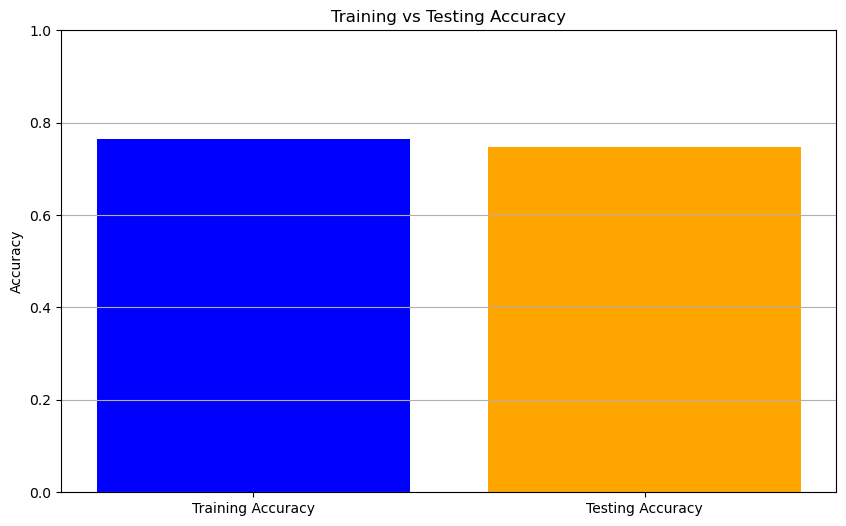

In [45]:
plt.figure(figsize=(10, 6))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy values range from 0 to 1
plt.grid(axis='y')
plt.show()

In [49]:
import pickle
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [50]:
def load_model():
    with open('sentiment_model.pkl', 'rb') as f:
        return pickle.load(f)

In [51]:
def chatbot(review_text):
    model = load_model()
    
    # Preprocess the input review text
    input_vector = vectorizer.transform([review_text])
    
    # Predict the sentiment
    prediction = model.predict(input_vector)[0]
    
    # Map prediction to sentiment
    sentiment_map = {1: 'positive', 0: 'neutral', -1: 'negative'}
    return sentiment_map[prediction]



### Chatbot interaction

In [ ]:
while True:
    user_input = input("Enter a review (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    sentiment_result = chatbot(user_input)
    print(f"The review sentiment is: {sentiment_result}")

Enter a review (or type 'exit' to quit):  No vart æ litt meir fornøyd me facebook'en ja:-) få t siste oppdateringa no me resten som mangle, så bli d genialt d her;-)


The review sentiment is: neutral
